In [1]:
#!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

In [1]:
review_file = 'subtaskB_clean_dev_cased.csv'

In [2]:
import pandas as pd

x_train = pd.read_csv('subtaskB_clean_dev_cased.csv')

In [3]:
x_train.head()

,comment_text,topic
0,"Siamo davanti ad una prova, e non solo di quoz...",Qanon
1,La storia dei 2 bimbi di Bergamo - vaccini: qu...,Covid
2,L'avete capito che non toglieranno il green pa...,Covid
3,Quindi la farsa dello spazio e della terra a ...,Terra Piatta
4,"In breve tempo, per accedere a Internet, sarà ...",Qanon


In [4]:
x_train['topic'].unique()

array(['Qanon', 'Covid', 'Terra Piatta', 'Russia'], dtype=object)

We perform tokenization removing frequent words, stopwords, rare words, and counting frequencies.

Every document is converted from a string to a set of the words it is composed of, each one associated with its frequency in the document.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
en_stopwords = stopwords.words('italian')

tf_vectorizer = CountVectorizer(stop_words=en_stopwords, max_df=0.5, min_df=5,max_features = 1000, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(x_train['comment_text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 4

lda = LatentDirichletAllocation(n_components=n_components, max_iter=101,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(tf)


iteration: 1 of max_iter: 101
iteration: 2 of max_iter: 101
iteration: 3 of max_iter: 101
iteration: 4 of max_iter: 101
iteration: 5 of max_iter: 101
iteration: 6 of max_iter: 101
iteration: 7 of max_iter: 101
iteration: 8 of max_iter: 101
iteration: 9 of max_iter: 101
iteration: 10 of max_iter: 101
iteration: 11 of max_iter: 101
iteration: 12 of max_iter: 101
iteration: 13 of max_iter: 101
iteration: 14 of max_iter: 101
iteration: 15 of max_iter: 101
iteration: 16 of max_iter: 101
iteration: 17 of max_iter: 101
iteration: 18 of max_iter: 101
iteration: 19 of max_iter: 101
iteration: 20 of max_iter: 101
iteration: 21 of max_iter: 101
iteration: 22 of max_iter: 101
iteration: 23 of max_iter: 101
iteration: 24 of max_iter: 101
iteration: 25 of max_iter: 101
iteration: 26 of max_iter: 101
iteration: 27 of max_iter: 101
iteration: 28 of max_iter: 101
iteration: 29 of max_iter: 101
iteration: 30 of max_iter: 101
iteration: 31 of max_iter: 101
iteration: 32 of max_iter: 101
iteration: 33 of 

LatentDirichletAllocation(max_iter=101, n_components=4, n_jobs=-1, verbose=1)

In [11]:
def print_top_words(model, feature_names, n_top_words, file_name):
  #open text file
  text_file = open(file_name, "w")
  for topic_idx, topic in enumerate(model.components_):
    message = f'Topic {topic_idx}: '
    message += ', '.join([feature_names[i]
                            for i in topic.argsort()[:-n_top_words - 1:-1]])
    text_file.write(message)
    print(message)
    print()
  text_file.close()

In [13]:
n_top_words = 100
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words, 'Top_words_TM.txt')

Topic 0: covid, 19, covid 19, vaccini, vaccino, persone, sieri, vaccinazione, dopo, anni, morti, pandemia, vaccinati, pfizer, virus, dott, mrna, bambini, essere, salute, dati, stato, dosi, solo, casi, sars, dose, cov, sars cov, effetti, 2021, of, studio, possono, rischio, può, due, lockdown, infezione, sieri covid, stati, grafene, avversi, tutta, 2022, vaccini covid, gravi, decessi, dittatura, bnt162b2, moderna, spike, efficacia, milioni, studi, durante, parte, popolazione, test, tasso, usa, italia, rispetto, prof, termine, anticorpi, vaiolo, verità, mesi, siero, controllo, stata, variante, proteina, età, morte, lungo, effetti collaterali, collaterali, causa, eventi, già, giovani, comple, aumento, omicron, miocardite, condividi, caso, mondiale, né, prima, avanti, pubblica, senza, state, malattia, sistema, 000, governo

Topic 1: solo, no, pass, essere, fare, sempre, green, green pass, cosa, quando, senza, fa, vax, fatto, obbligo, libertà, persone, dittatura, poi, vaccino, così, sistema,

- topic 0 => covid
- topic 1 => vaccino/terra piatta?
- topic 2 => russia
- topic 3 => qanon

## Projecting documents into topics
The transform methods of the LDA model, transforms the tf vectors of documents into topic vectors.
The weights of a topic vector for a document indicates how the content of a document can be considered to be originated by the various topics.

In [14]:
doc_topics = lda.transform(tf)
doc_topics

array([[0.00800144, 0.58232656, 0.00827311, 0.40139889],
       [0.37738944, 0.4890757 , 0.07065688, 0.06287798],
       [0.02538145, 0.92311463, 0.02536168, 0.02614225],
       ...,
       [0.0214876 , 0.02212509, 0.74152596, 0.21486136],
       [0.56425379, 0.0095411 , 0.12874351, 0.29746161],
       [0.08536685, 0.09078493, 0.08335143, 0.74049679]])

In [15]:
doc_topics.shape

(810, 4)

The highest weighted topic is the one the document may be assigned to.

In [16]:
import numpy as np

labels = np.argmax(doc_topics,axis=1)

In [17]:
import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis


In [18]:
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(lda,tf,tf_vectorizer)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.049871  0.188300       1        1  29.085849
0      0.247756 -0.030173       2        1  26.783292
2     -0.079811 -0.047156       3        1  22.677743
3     -0.118073 -0.110970       4        1  21.453116, topic_info=         Term        Freq       Total Category  logprob  loglift
191     covid  171.000000  171.000000  Default  30.0000  30.0000
906     trump   88.000000   88.000000  Default  29.0000  29.0000
9          19   91.000000   91.000000  Default  28.0000  28.0000
192  covid 19   84.000000   84.000000  Default  27.0000  27.0000
949   vaccino  108.000000  108.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
276       due   18.048506   48.075918   Topic4  -5.2730   0.5596
711    quando   19.123981   85.595560   Topic4  -5.2151   0.0406
90       aver   17.073605   44.224019   Topic4  -5.3285   0.5876
302    essere   18.632158  130.917423   Topic4  -5.2412  -0.4104
63       anni   18.135113   98.129018   Topic4  -5.2682  -0.1491

[252 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
9         2  0.989550     19
11        3  0.915968   2000
17        2  0.852652   2021
17        3  0.040602   2021
17        4  0.081205   2021
...     ...       ...    ...
995       3  0.048375  vuole
995       4  0.919127  vuole
997       4  0.975825    wef
999       2  0.254960  élite
999       4  0.722386  élite

[340 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [21]:
pyLDAvis.save_html(vis, 'lda.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


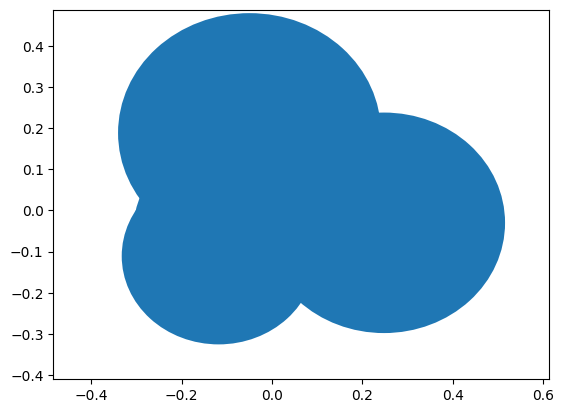

In [20]:
pyLDAvis.save_json(vis, 'lda.json')

# Read JSON file

import json

with open('lda.json', 'r') as myfile:
    data=myfile.read()

json_data = json.loads(data)


# Plot with matplotlib

import matplotlib.pyplot as plt

x_max = max(json_data['mdsDat']['x']) + (max(json_data['mdsDat']['x']) - min(json_data['mdsDat']['x']))
y_max = max(json_data['mdsDat']['y']) + (max(json_data['mdsDat']['y']) - min(json_data['mdsDat']['y']))
x_min = min(json_data['mdsDat']['x']) - (max(json_data['mdsDat']['x']) - min(json_data['mdsDat']['x']))
y_min = min(json_data['mdsDat']['y']) - (max(json_data['mdsDat']['y']) - min(json_data['mdsDat']['y']))

plt.axis([x_min, x_max, y_min, y_max])

# Depending on the number of topics, you may need to tweak the paremeters (e.g. the size of circles be Freq/100 or Freq/200, etc)

for i in range(len(json_data['mdsDat']['x'])):
    circle = plt.Circle((json_data['mdsDat']['x'][i],json_data['mdsDat']['y'][i]), radius = json_data['mdsDat']['Freq'][i]/100)
    plt.gca().add_artist(circle)

plt.show()